h_x=0.025, h_y=0.0375, τ=0.02


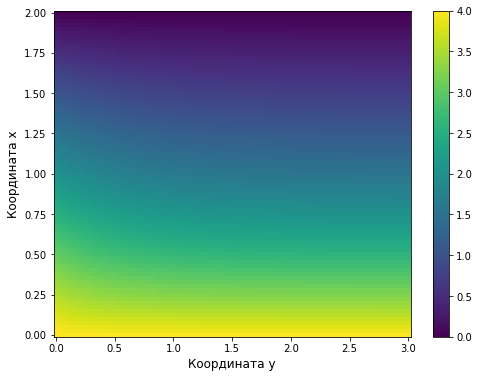

maximum abs =  4.0
h_x=0.0125, h_y=0.01875, τ=0.005


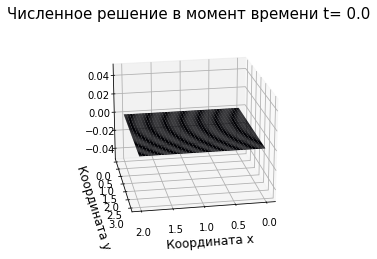

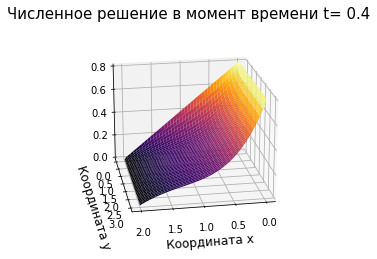

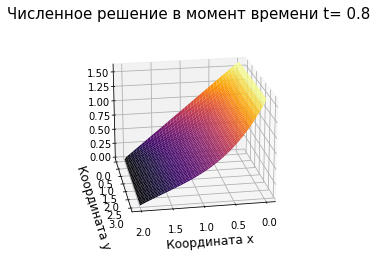

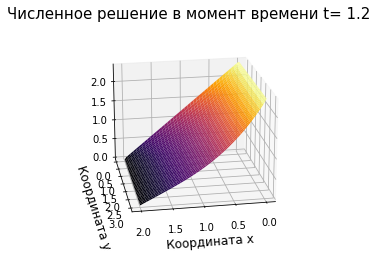

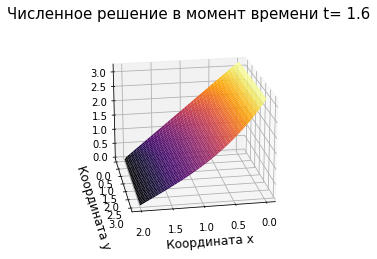

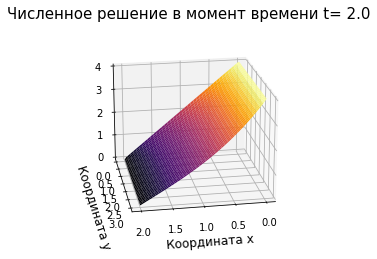

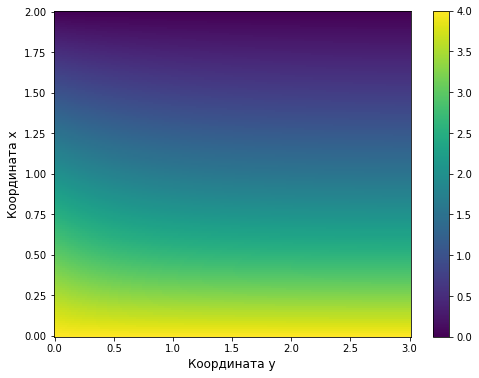

maximum abs =  4.0
0.03975
0.0099375


In [5]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
N = 80+1
M = 80+1
K = 100+1
T = 2
N_2 = 180+1
M_2= 180+1
K_2 = 100+1
T_2 = 2
x = np.linspace(0,2,N)
y = np.linspace (0,3,M)
t = np.linspace (0,T,K)
x_2 = np.linspace(0,2,N_2)
y_2 = np.linspace (0,3,M_2)
t_2 = np.linspace (0,T_2,K_2)
h_x = 2/(N-1)
h_y = 3/(M-1)
τ = T/(K-1)
τ_2=T_2 /(K_2-1)
print('h_x='+str(h_x)+', h_y='+str(h_y)+', τ='+str(τ))
γ_x = τ / (h_x**2)
γ_y = τ / (h_y**2)
u = np.zeros((N, M, 2 * K + 1))
u_delta = np.zeros((N, M, K+1))

def F_1(i , j , k, a):
 return 0.5*γ_y*(a[i, j-1, k-1] + a[i, j+1, k-1]) + (1-γ_y)*a[i, j, k-1]+0.5*τ*np.exp(-τ*(k+1)/2)*sin(x[i])*sin(y[j])
def F_2(i , j , k, a):
 return 0.5*γ_x*(a[i-1, j, k-1] + a[i+1, j, k-1]) + (1-γ_x)*a[i, j, k-1]+0.5*τ*np.exp(-τ_2*(k+1)/2)*sin(x_2[i])*sin(y_2[j])
def progonka_x(j, k, a):
 d = np.zeros(N)
 δ = np.zeros(N)
 d[1] = 0
 δ[1] = 2*t[round((k-1)/2)]
 A = 0.5 * γ_x
 B = 1 + γ_x
 C = 0.5 * γ_x
 for m in range(1,N-1):
    Fm_1 = - F_1(m,j,k,a)
    d[m+1] = C / (B - A * d[m])
    δ[m+1] = (Fm_1 - A * δ[m]) / (A * d[m] - B)
 a[N-1, j, k] = 0
 for m in range(N-1, 0, -1):
    a[m-1, j, k] = d[m] * a[m, j, k] + δ[m]
def progonka_y(i, k, a):
 d = np.zeros(M)
 δ = np.zeros(M)
 d[1] = 0

 δ[1] = (2-x[i-1])*t[round((k-1)/2)]
 A = 0.5 * γ_y
 B = 1 + γ_y
 C = 0.5 * γ_y
 for m in range(1,M-1):
    Fm_1 = - F_2(i,m,k,a)
    d[m+1] = C / (B - A * d[m])
    δ[m+1] = (Fm_1 - A * δ[m]) / (A * d[m] - B)
    a[i, M-1, k] = δ[-1] / (1 - d[-1])
 for m in range(M-1, 0, -1):
    a[i, m-1, k] = d[m] * a[i, m, k] + δ[m]
#начальные и граничные условия на осях x и y
u[:,:,0] = 0
for k in range(0, K):
 u[0,:,k*2]=2*t[k]
for k in range(0, K-1):
 u[0,:,k*2+1]=t[k]+t[k+1]
for i in range(1,N-1):
 for k in range(0, K):
    u[i,0,k*2]=0
 for k in range(0, K-1):
    u[i,0,k*2+1]=0
#метод прогонки
for k in range(1, 2*K, 2):
 for j in range(1, M-1):
    progonka_x(j, k, u)
 for i in range(1, N-1):
    progonka_y(i, k+1, u)
#исключаем полуцелые слои
for i in range(0, N):
 for j in range(0, M):
    for k in range(0, K):
        u_delta[i,j,k]=u[i,j,k*2]
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(y,x,u_delta[:,:,K-1])
plt.colorbar()
plt.xlabel('Координата y', fontsize=12)
plt.ylabel('Координата x', fontsize=12)
plt.show()
#максимум по модулю
u_max=np.max((np.max(u_delta), abs(np.min(u_delta))))
print('maximum abs = ', u_max)
#3D график
12
def grafic(a, k):
 fig = plt.figure()

 ax = fig.add_subplot(projection='3d')
 t = np.linspace (0,T,len(a[1,1]))
 x, y = np.linspace(0, 2, len(a)), np.linspace(0, 3, len(a[1]))
 y, x = np.meshgrid(y, x)
 surf = ax.plot_surface(x, y, a[:, :, k], cmap='inferno')
 plt.xlabel('Координата x', fontsize=12)
 plt.ylabel('Координата y', fontsize=12)
 ax.view_init(20, 80)
 plt.title('Численное решение в момент времени t= ' + str(k*τ), fontsize=15)
for i in range(0, K, 20):
 grafic(u_delta, i)
#сгущаем сетку
N = N*2-1
M = M*2-1
K = K*4-3
x = np.linspace(0,2,N)
y = np.linspace (0,3,M)
t = np.linspace (0,T,K)
h_x = 2/(N-1)
h_y = 3/(M-1)
τ = T/(K-1)
print('h_x='+str(h_x)+', h_y='+str(h_y)+', τ='+str(τ))
γ_x = τ / (h_x**2)
γ_y = τ / (h_y**2)
u2 = np.zeros((N, M, 2 * K + 1))
u_delta2 = np.zeros((N, M, K+1))
#начальные и граничные условия на осях x и y
u2[:,:,0] = 0
for k in range(0, K):
 u2[0,:,k*2]=2*t[k]
for k in range(0, K-1):
 u2[0,:,k*2+1]=t[k]+t[k+1]
for i in range(1,N-1):
 for k in range(0, K):
    u2[i,0,k*2]=(2-x[i])*t[k]
 for k in range(0, K-1):
    u2[i,0,k*2+1]=0.5*(2-x[i])*(t[k]+t[k+1])
#метод прогонки
for k in range(1, 2*K, 2):
 for j in range(1, M-1):
    progonka_x(j, k, u2)
 for i in range(1, N-1):
    progonka_y(i, k+1, u2)

#исключаем полуцелые слои
for i in range(0, N):
 for j in range(0, M):
    for k in range(0, K):
        u_delta2[i,j,k]=u2[i,j,k*2]
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(y,x,u_delta2[:,:,K-1])
plt.colorbar()
plt.xlabel('Координата y', fontsize=12)
plt.ylabel('Координата x', fontsize=12)
plt.show()
u_max=np.max((np.max(u_delta2), abs(np.min(u_delta2))))
print('maximum abs = ', u_max)
#вычисляем молуль разности
for i in range(0, len(u_delta)):
 for j in range(0, len(u_delta[i])):
    for k in range(0, len(u_delta[i,j])-1):
        u_delta[i,j,k]=abs(u_delta[i,j,k]-u_delta2[2*i,2*j,4*k])
#for i in range(0, len(u_delta[1,1]), 20):
# grafic(u_delta, i)
print(np.max(u_delta))
print(np.max(u_delta)/u_max)
plt.show()